In [1]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [8]:
forest = pd.read_csv('modis_2020_United_States.csv')
forest.head()
forest = forest.drop(['track'], axis = 1)
forest = forest.drop(['instrument', 'version', 'type'], axis = 1)
forest.head()
#daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

#forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

#forest['type'].value_counts()
#types = pd.get_dummies(forest['type'])
#forest = pd.concat([forest, types], axis=1)
#forest = forest.drop(['type'], axis = 1)
#forest.head()
#forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

forest['acq_date'] = pd.to_datetime(forest['acq_date'])
forest = forest.drop(['scan'], axis = 1)
forest['year'] = forest['acq_date'].dt.year
forest.head()

forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day
forest.shape



(153848, 14)

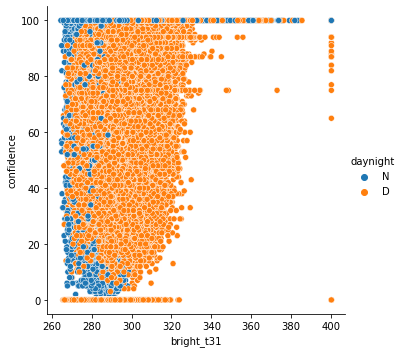

In [9]:
sns.relplot(x='bright_t31', y='confidence',hue='daynight',data=forest)

/Users/sasi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='confidence', ylabel='Density'>

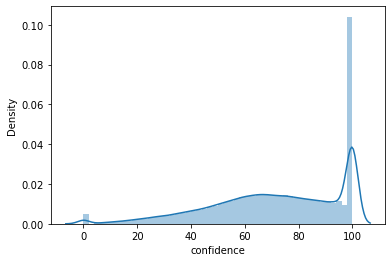

In [11]:
sns.distplot(forest['confidence'])

/Users/sasi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bright_t31', ylabel='Density'>

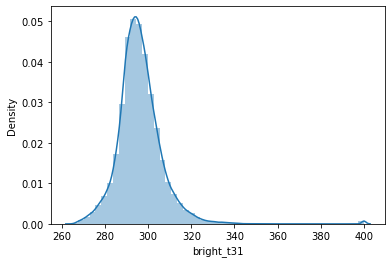

In [12]:
sns.distplot(forest['bright_t31'])

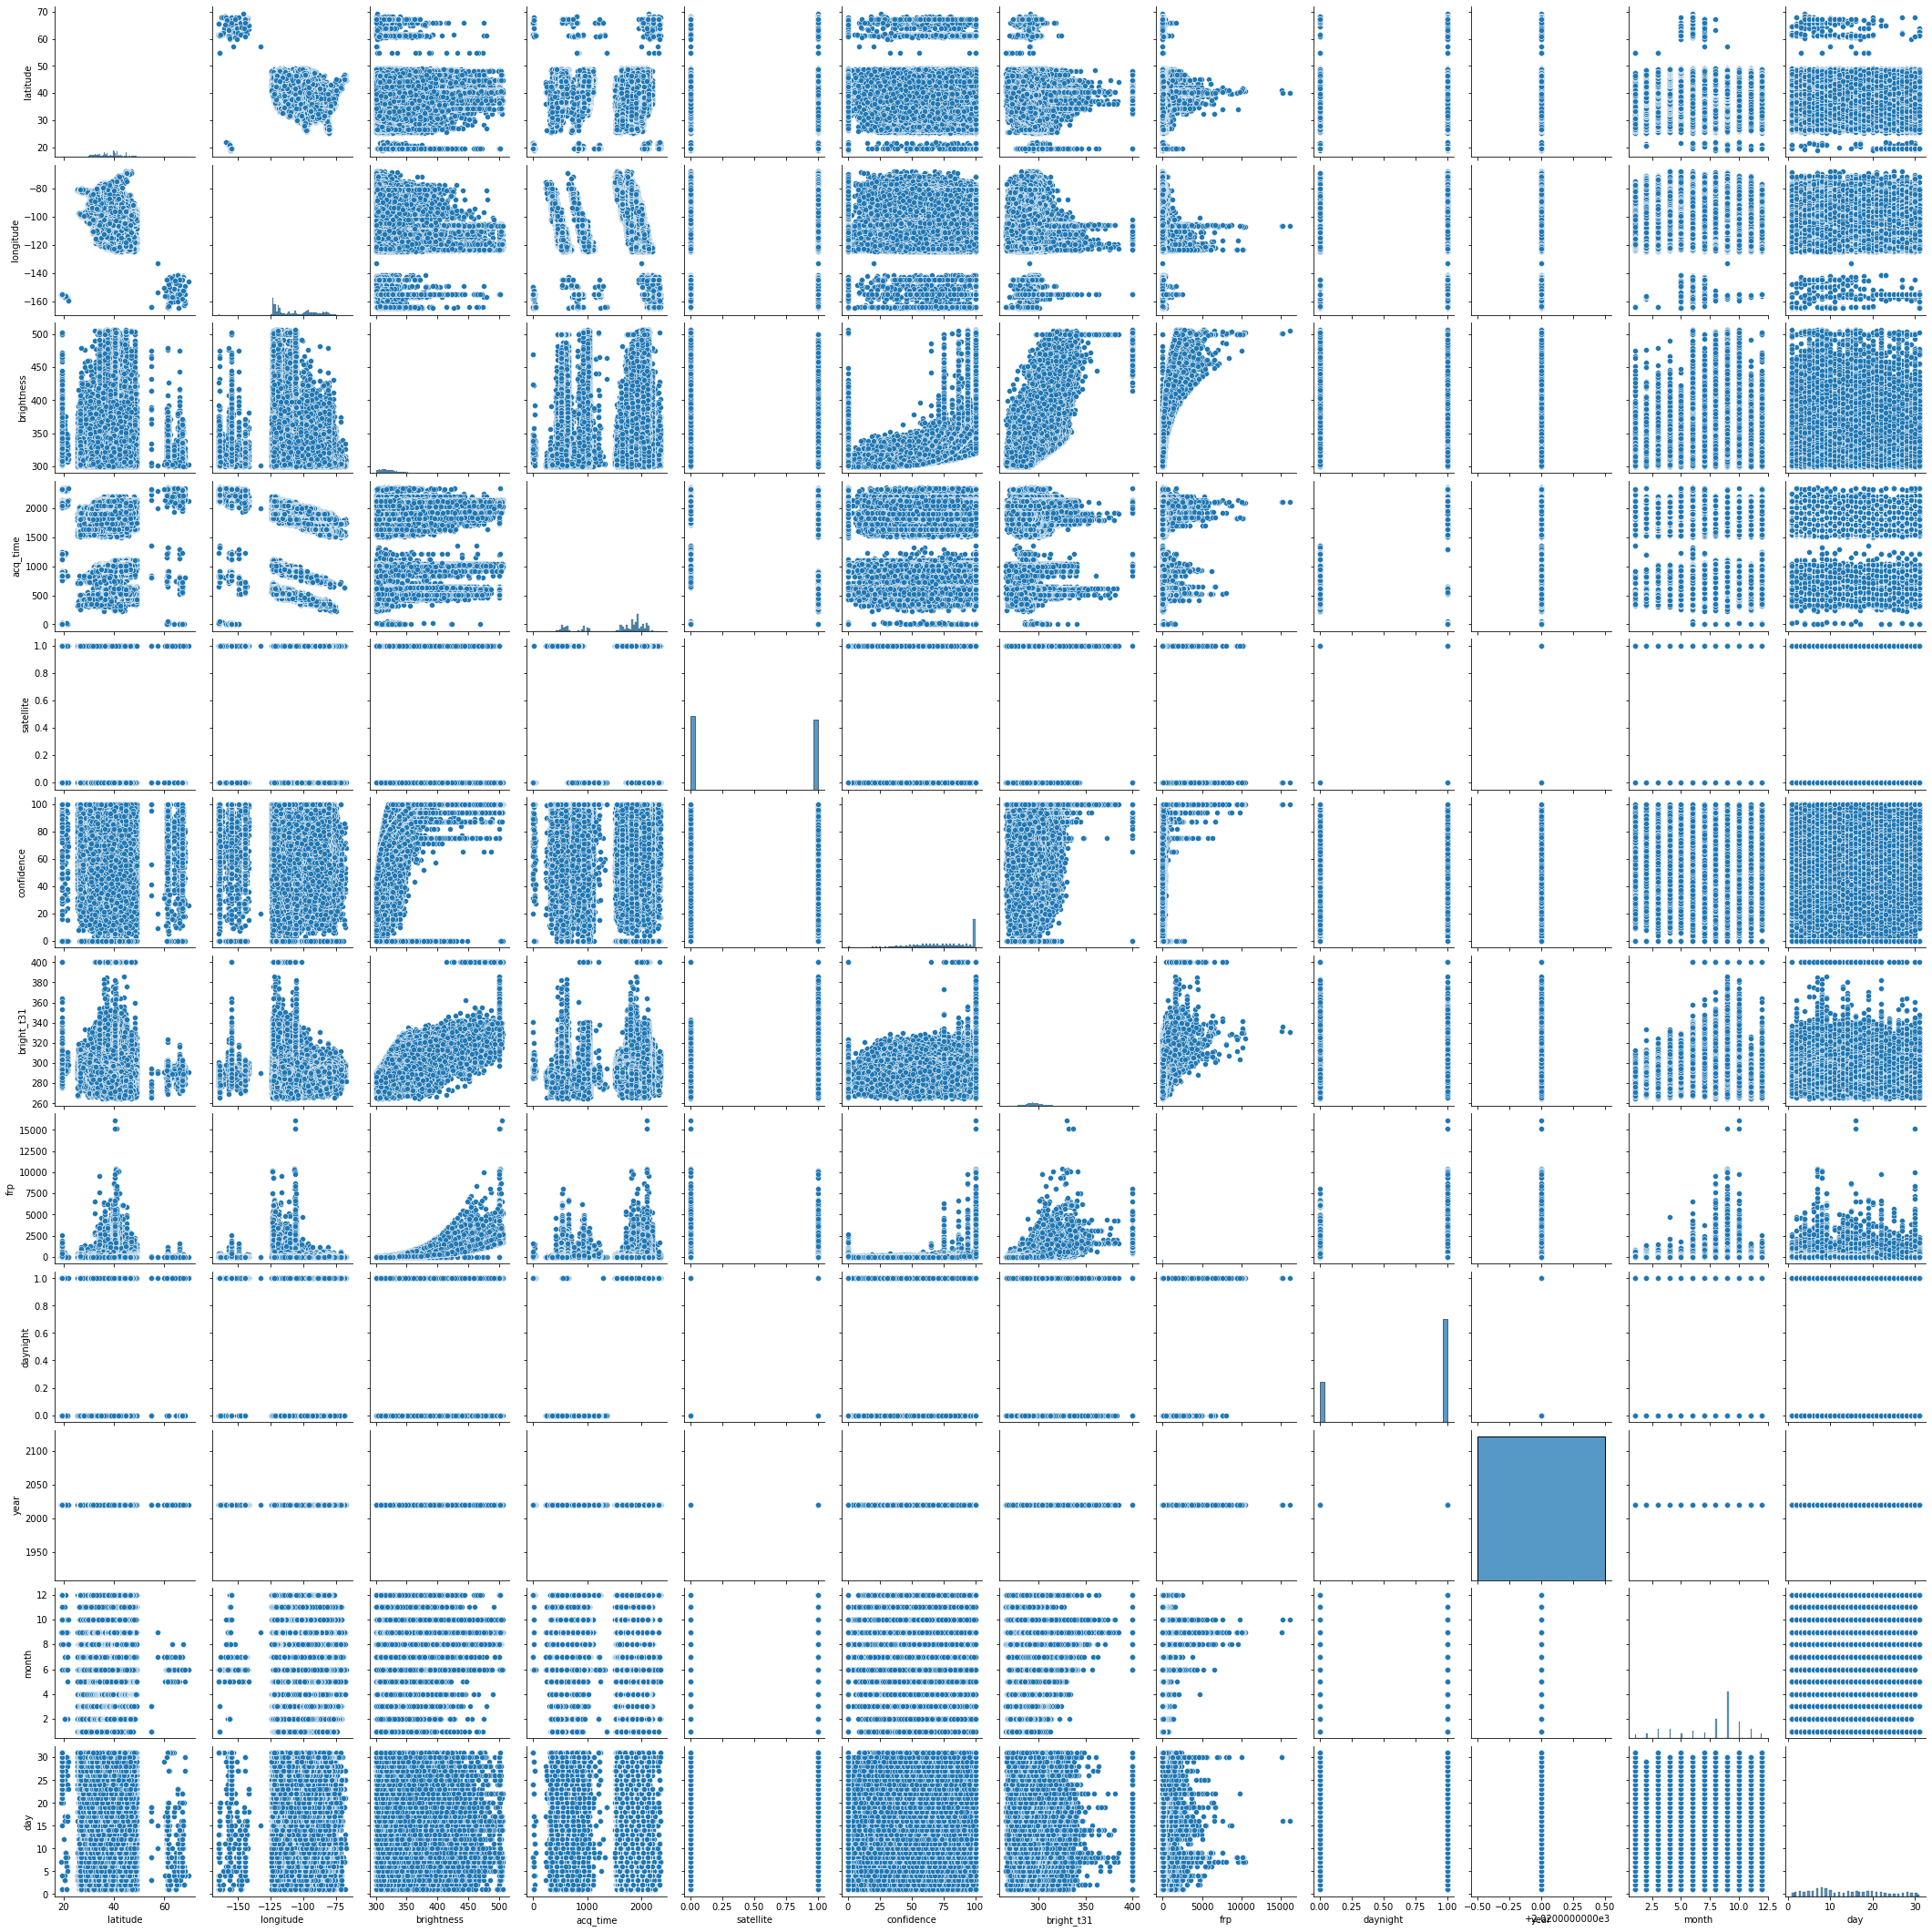

In [6]:
sns.pairplot(forest)

In [3]:
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31'], axis = 1)
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)
print(' Xtrain Shape:',Xtrain.shape)
print(' Xtest Shape:',Xtest.shape)
print(' ytrain Shape:',ytrain.shape)
print(' ytest Shape:',ytest.shape)

 Xtrain Shape: (123078, 10)
 Xtest Shape: (30770, 10)
 ytrain Shape: (123078,)
 ytest Shape: (30770,)


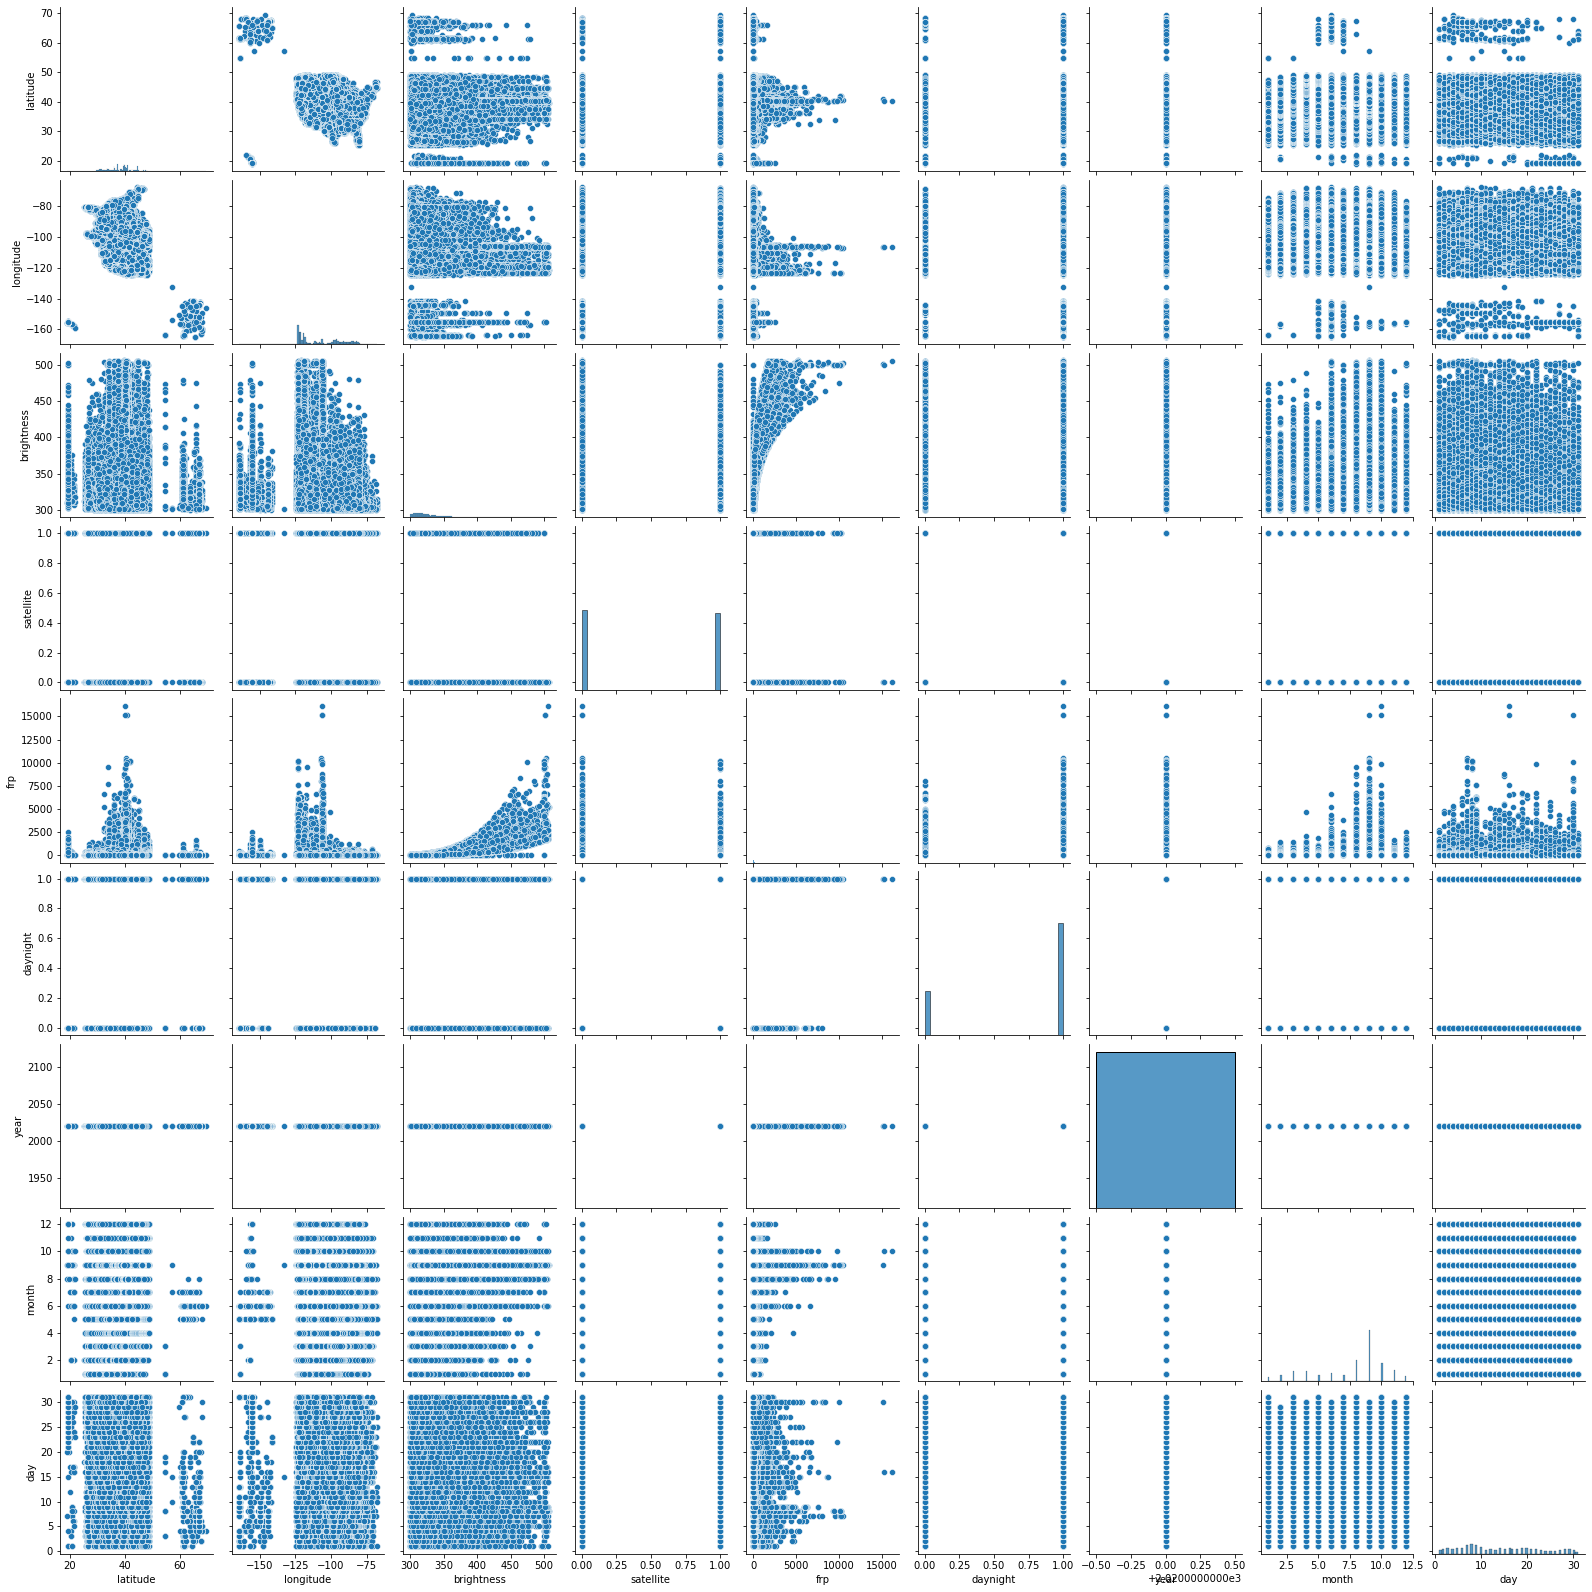

In [5]:
sns.pairplot(fin)

In [4]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.85 %


In [46]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

69.45 %


In [47]:
modeltest = pd.read_csv('modeltest.csv')
modeltest.head()
modeltest = modeltest.drop(['track'], axis = 1)
#modeltest = modeltest.drop(['instrument', 'version'], axis = 1)
modeltest = modeltest.drop(['version'], axis = 1)
daynight_map = {"D": 1, "N": 0}
satellite_map = {"T": 1, "A": 0}

modeltest['daynight'] = modeltest['daynight'].map(daynight_map)
modeltest['satellite'] = modeltest['satellite'].map(satellite_map)
#modeltest['type'].value_counts()
#types = pd.get_dummies(modeltest['type'])
#modeltest = pd.concat([modeltest, types], axis=1)

#modeltest = modeltest.drop(['type'], axis = 1)
#modeltest.head()

#modeltest = modeltest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})
#bins = [0, 1, 2, 3, 4, 5]
#labels = [1,2,3,4,5]
modeltest['scan_binned'] = pd.cut(modeltest['scan'], bins=bins, labels=labels)

modeltest['acq_date'] = pd.to_datetime(modeltest['acq_date'])
modeltest = modeltest.drop(['scan'], axis = 1)
modeltest['year'] = modeltest['acq_date'].dt.year
modeltest.head()

modeltest['month'] = modeltest['acq_date'].dt.month
modeltest['day'] = modeltest['acq_date'].dt.day
modeltest.shape
modeltest = modeltest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31' ], axis = 1)

In [48]:
given_pred = random_model.predict(modeltest)

In [49]:
modeltest.head()

,latitude,longitude,brightness,satellite,frp,daynight,scan_binned,year,month,day
0,37.48611,-112.36265,345.83,1,55.35,1,1,2022,4,8
1,37.48611,-112.36265,345.83,1,55.35,1,1,2022,4,9
2,37.48611,-112.36265,345.83,1,55.35,1,1,2022,4,10
3,37.48611,-112.36265,345.83,1,55.35,1,1,2022,4,11
4,37.48611,-112.36265,345.83,1,55.35,1,1,2022,4,12


In [50]:
Xtest.head()

,latitude,longitude,brightness,satellite,frp,daynight,scan_binned,year,month,day
62697,36.1044,-121.5499,330.4,1,49.5,1,2,2020,8,22
44104,38.8798,-119.5858,393.4,1,253.2,1,2,2020,7,7
105656,39.5896,-123.1440,315.5,1,55.2,0,3,2020,9,16
1064,29.4679,-97.2890,325.5,1,22.6,1,1,2020,1,8
125806,47.2679,-123.1854,308.2,1,18.5,1,2,2020,10,6


In [51]:
print(given_pred)

[86.78666667 87.32333333 86.96       87.29333333 87.24333333]


In [23]:
given_pred.shape

(153848,)

In [25]:
y_pred.shape

(30770,)

In [26]:
modeltest.shape

(153848, 13)